## Machine Learning - Ex.5

Submitted by: [Osnat Haj Yahia]

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC  # *** NEW THING !!! ***

### The Kernel trick

Generate a random sample of five 2-D points ($n=5,\ d=2$):

$$ x^{(i)}=(x_1,x_2)\in R^2\ ,\\  i=1,..,n$$

Next, map these 2-D points into a 6-D *feature-space* using the following (quadratic) mapping:

$$ \Phi(x)= (1,\sqrt 2 x_1,\sqrt 2 x_2,x_1^2,x_2^2,\sqrt 2 x_1 x_2)$$

We will calculate the **inner-products** between samples in the *feaure-space* in two ways:

(1) Explicit calculation in the 6-D *feature-space*:

 $$ G_{i,j}=\Phi(x^{(i)})\cdot\Phi(x^{(j)}) $$
 
 
(2) Using the **kernel trick** (which involves computations only in the 2-D *input-space*):

$$ K_{i,j}=\left(x^{(i)},x^{(j)}\right) \ ,\ \ K(u,v)=(1+u\cdot v)^2$$

Verify that results in both ways are indeed indentical.




In [44]:
N = 5

x = np.random.random((N,2))*10

### Linear SVM

In this exercise we will use 'sklearn' library's implementation of the SVM classifier:

<http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>

Use their SVC module to train a linear SVM classifier on the following (linearly seperable) points.

Set the SVC parameters with kernel='linear' and C=1000.

Use the 'predict' method to count how many examples were misclassified.

Use the 'decision_function' method to visualize decision function $Z(x_1,x_2)$ (using plt.contour function)

Mark the decision boundary $Z=0$ and the margin lines: $Z=-1$ and $Z=1$.

Use the 'support_' attribute to mark the support-vectors.

Hint: <http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html>

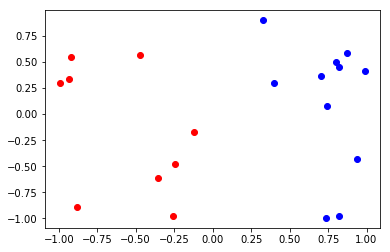

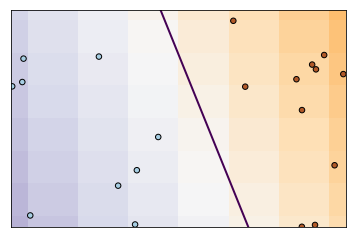

In [46]:
N = 20
x = np.random.random((N,2))*2-1
w = np.array([3,1])
z = np.dot(x,w)
y = np.sign(z)

plt.plot(x[y==-1,0],x[y==-1,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()

xx, yy = np.meshgrid(np.linspace(-3, 3, N),
                     np.linspace(-3, 3, N))

# your code here..
clf = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(x, y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z , levels=[0], linewidths=2,linetypes='--')
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=plt.cm.Paired,edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-1, 1, -1, 1])
plt.show()

### Nonlinear SVM

Load the data points the file 'nonlinear.csv'. 

Clearly, these points are not linearly seperable in their 2-D *input space*. We will use the SVM classifier with RBF kernel to classify them in the *feature-space* (induced by the RBF kernel).

Set the SVC parameters with kernel='linear' and C=1000, and try different values of the gamma parameter until you are satisfied with the results (e.g., count misclassification, and inspect the location of the support vectors).

Visualize the results in the same way as before.


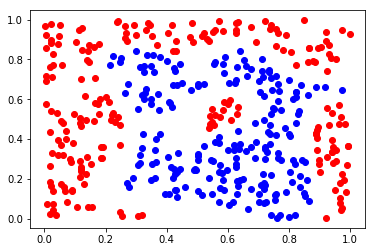

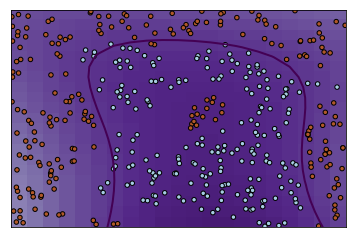

In [36]:
data=np.loadtxt('nonlinear.csv', delimiter=',')
N = data.size
x = data[:,0:2]
y = data[:,2]
plt.plot(x[y==-1,0],x[y==-1,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')
plt.show()



xx, yy = np.meshgrid(np.linspace(-30, 30, N),
                     np.linspace(-30, 30, N))


# your code here..
clf = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(x, y)



# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,linetypes='--')
plt.scatter(x[:, 0], x[:, 1], s=20, c=y, cmap=plt.cm.Paired,edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([0, 1, 0, 1])
plt.show()

## Good luck !